# Import Libraries

In [1]:
import pandas as pd\
,numpy as np\
,matplotlib.pyplot as plt\
,seaborn as sns\
,warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

In [3]:
display(train.head())
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#  Inspecting The Training data

In [4]:
train.shape

(614, 13)

In [5]:
train.size

7982

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# print("test to train ratio is 2/3")

# Inspecting The Test Data

In [9]:
test.shape

(367, 12)

In [10]:
test.size

4404

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [12]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

##### Note: Data consisting of null values so It's important to fill null values before train-test split. This ensures that imputation methods rely solely on the training set, preventing data leakage from the test set into the training process and maintaining model evaluation integrity.(i.e i will concat the train test data)

# Data Cleaning

In [13]:
data = pd.concat((train,test),axis=0)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
data.shape

(981, 13)

In [15]:
data.size

12753

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [17]:
data.isna().sum()[0:-1] ## the target variable is excluded from consideration.

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

# Missing value imputation

In [18]:
for col in data.columns:
    if data[col].dtype == "object":
        data[col].fillna(data[col].mode().iloc[0], inplace = True)
    else:
        data[col].fillna(data[col].mean(), inplace = True)        

In [19]:
data.isna().sum()[0:-1].sum() ## We can see that now data is not containg null values

0

# Exploratory Data Analysis

In [20]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,981.00000,981.000000,981.000000
mean,5179.795107,1601.916330,142.51153,342.201873,0.835920
std,5695.104533,2718.772806,76.34777,64.432886,0.355304
min,0.000000,0.000000,9.00000,6.000000,0.000000
25%,2875.000000,0.000000,101.00000,360.000000,1.000000
50%,3800.000000,1110.000000,128.00000,360.000000,1.000000
75%,5516.000000,2365.000000,160.00000,360.000000,1.000000
max,81000.000000,41667.000000,700.00000,480.000000,1.000000


In [21]:
data.describe(include = "object").T

,count,unique,top,freq
Loan_ID,981,981,LP001002,1
Gender,981,2,Male,799
Married,981,2,Yes,634
Dependents,981,4,0,570
Education,981,2,Graduate,763
Self_Employed,981,2,No,862
Property_Area,981,3,Semiurban,349
Loan_Status,981,2,Y,789


<AxesSubplot: >

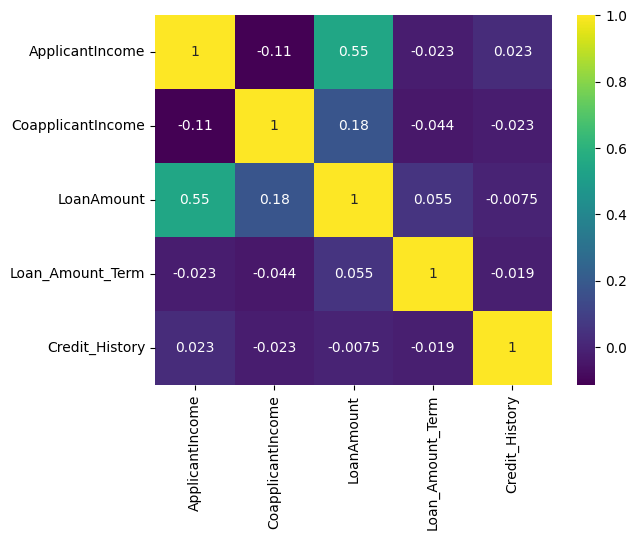

In [22]:
sns.heatmap(data.corr(), annot = True, cmap = "viridis")

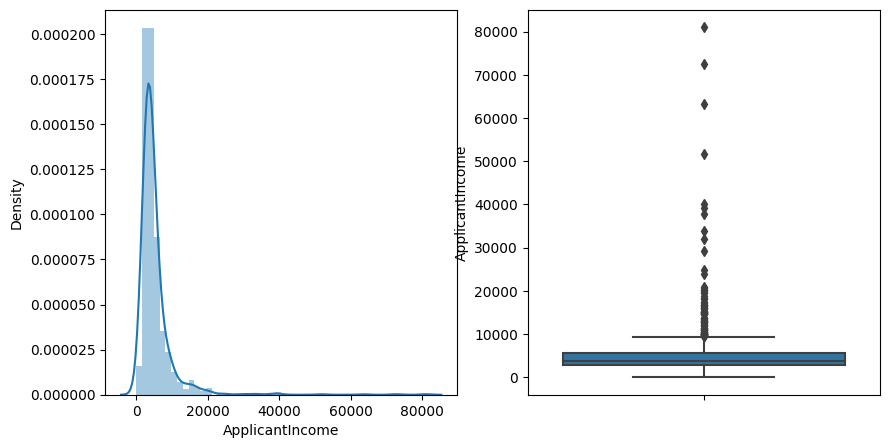

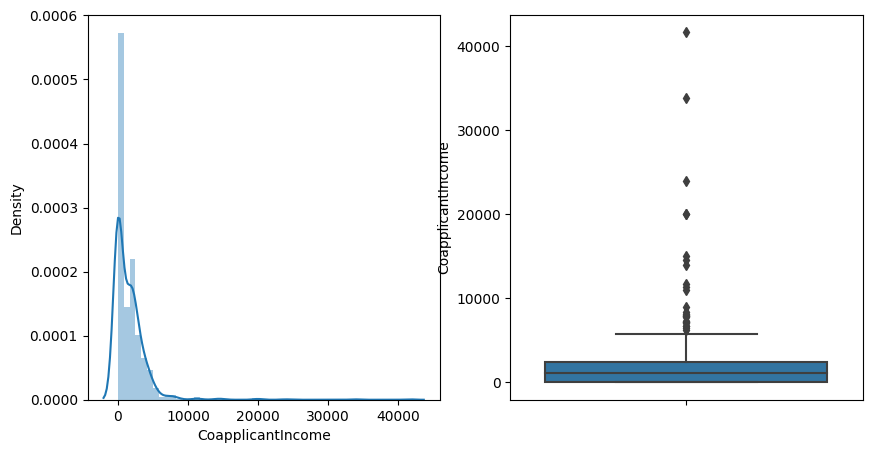

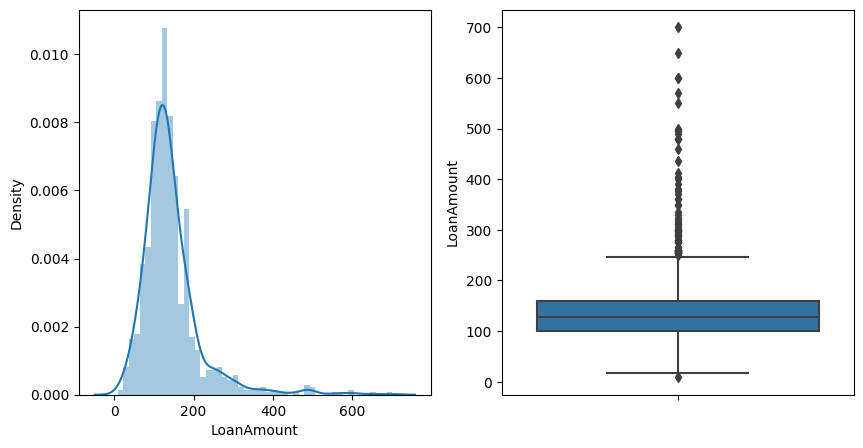

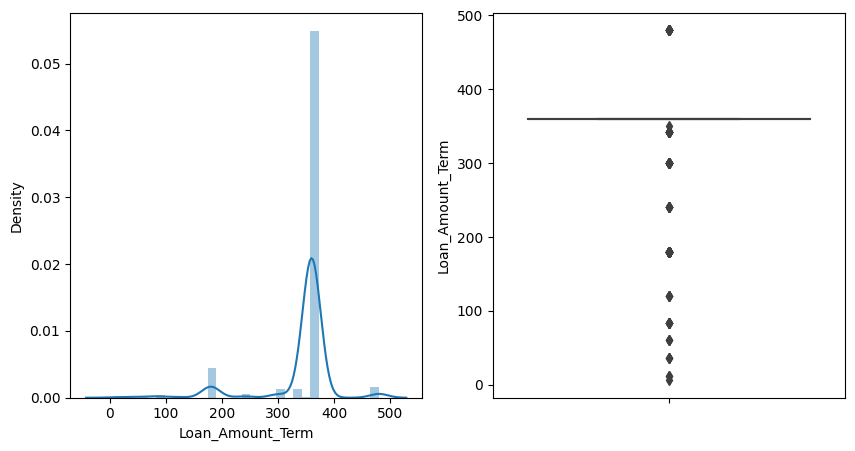

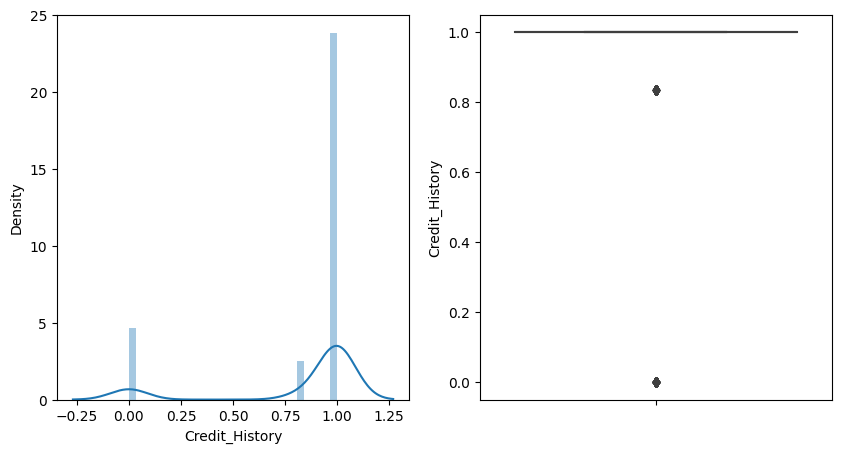

In [23]:
for col in data.columns:
    if data[col].dtype != "object":
        fig ,(fig1 , fig2) = plt.subplots(1,2,figsize=(10,5))
        sns.distplot(data[col], ax = fig1)
        sns.boxplot(y = data[col], ax = fig2)
        plt.show()

### Data seems to be normally distributed 

#####  The 'Loanamount' variable contains outliers, and it's worth noting that removing them might not be appropriate in this context. Outliers in loan amounts can be legitimate and reflect the diversity of loan requests, as individuals may apply for various amounts based on their specific financial needs and circumstances. Therefore, retaining these outliers is essential to maintain the integrity of the dataset and accurately represent the range of loan amounts that individuals may seek.

# Feature engineering

In [24]:
from sklearn.preprocessing import LabelEncoder

for col in data.columns:
    if data[col].dtype == "object":
        Le = LabelEncoder()
        data[col]  = Le.fit_transform(data[col])

In [25]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,142.51153,360.0,1.00000,2,1
1,1,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.00000,0,0
2,2,1,1,0,0,1,3000,0.0,66.00000,360.0,1.00000,2,1
3,3,1,1,0,1,0,2583,2358.0,120.00000,360.0,1.00000,2,1
4,4,1,0,0,0,0,6000,0.0,141.00000,360.0,1.00000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,970,1,1,3,1,1,4009,1777.0,113.00000,360.0,1.00000,2,1
363,972,1,1,0,0,0,4158,709.0,115.00000,360.0,1.00000,2,1
364,975,1,0,0,0,0,3250,1993.0,126.00000,360.0,0.83592,1,1
365,978,1,1,0,0,0,5000,2393.0,158.00000,360.0,1.00000,0,1


### Train Test split

In [26]:
X = data.iloc[:,1:-1] ## This data is used to avoid bias-variance trade-off(Training data)
y = data.iloc[:,-1]

In [27]:
X_train, y_train, x_test=(data.iloc[:614,:-1], data.iloc[:614,-1], data.iloc[614:,:-1]) ## This data for actual model buliding

# Cross Validation

#### To cross-validate the model, we split the training data into four parts and select one-fourth of the training data for training in each iteration.

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


Cv = KFold(shuffle = True, random_state = 1000, n_splits = 4)
dt_classifier = DecisionTreeClassifier()
poly = PolynomialFeatures()
s = StandardScaler()

param_grid = {
    'DecisionTree__criterion': ['gini', 'entropy'],
    'DecisionTree__max_depth': [None, 5, 10, 15],
    'DecisionTree__min_samples_split': [2, 5, 10],
    'DecisionTree__min_samples_leaf': [1, 2, 4],
    'poly__degree': [2, 3]
}

estimator = Pipeline([
    ("poly", poly),
    ("scaler", s),
    ("DecisionTree", dt_classifier)
])

grid = GridSearchCV(estimator, param_grid, cv=Cv)
grid.fit(X, y)
print("Best Parameters: ", grid.best_params_)
print("Best Accuracy: ", grid.best_score_)

Best Parameters:  {'DecisionTree__criterion': 'entropy', 'DecisionTree__max_depth': 5, 'DecisionTree__min_samples_leaf': 1, 'DecisionTree__min_samples_split': 5, 'poly__degree': 2}
Best Accuracy:  0.8032354405176705


#### By employing cross-validation on the training dataset, we systematically explored a range of model parameters, allowing us to identify and select the optimal configuration that maximizes performance and generalization across multiple folds, ensuring a robust and well-tuned model

In [29]:
best_params = {
    'DecisionTree__criterion': 'entropy',
    'DecisionTree__max_depth': 5,
    'DecisionTree__min_samples_leaf': 1,
    'DecisionTree__min_samples_split': 2,
    'poly__degree': 3
}
dt_classifier = DecisionTreeClassifier(
    criterion=best_params['DecisionTree__criterion'],
    max_depth=best_params['DecisionTree__max_depth'],
    min_samples_leaf=best_params['DecisionTree__min_samples_leaf'],
    min_samples_split=best_params['DecisionTree__min_samples_split']
)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [30]:
Train_Predict = dt_classifier.predict(X_train)

In [32]:
Test_Predict = dt_classifier.predict(x_test)

### Confusion_matrix

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

print("confusion_matrix")
display(confusion_matrix(y_train,Train_Predict))

confusion_matrix


array([[110,  82],
       [ 19, 403]], dtype=int64)

### Accuracy_score

In [35]:
print("Model Accuracy =",round(accuracy_score(y_train, Train_Predict) * 100, 2))

Model Accuracy = 83.55


### Classification_report

In [36]:
print(classification_report(y_train, Train_Predict))

              precision    recall  f1-score   support

           0       0.85      0.57      0.69       192
           1       0.83      0.95      0.89       422

    accuracy                           0.84       614
   macro avg       0.84      0.76      0.79       614
weighted avg       0.84      0.84      0.83       614



In [37]:
Prediction = pd.DataFrame({"Loan_ID" : test["Loan_ID"], "Loan_Status":Test_Predict})
Prediction.set_index("Loan_ID")

,Loan_Status
Loan_ID,
LP001015,1
LP001022,1
LP001031,1
LP001035,1
LP001051,1
...,...
LP002971,1
LP002975,1
LP002980,1


### Decoding the prediction 

In [38]:
Prediction['Loan_Status'] = Prediction['Loan_Status'].map({1: "Y", 0: "N"})

### Converting dataframe into CSV file.

In [39]:
Prediction.to_csv("Solution File.csv")